In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### Question 1

In [2]:
cust_acq = pd.read_csv('D:\python\proj_4\Customer Acqusition.csv')
repay = pd.read_csv('D:\python\proj_4\Repayment.csv')
spend = pd.read_csv('D:\python\proj_4\spend.csv')

### a)

In [3]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [4]:
repay.head(2)

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN


In [5]:
repay.drop(columns='Unnamed: 4' , axis=1,inplace=True)

In [6]:
repay.head(2)

,SL No:,Customer,Month,Amount
0,NaN,A1,12-Jan-04,495414.75
1,2.0,A1,3-Jan-04,245899.02


In [7]:
cust_acq.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [8]:
avg_age = cust_acq['Age'].mean()

In [9]:
avg_age

46.49

In [10]:
##$$$$$$  cust_acq['Age'].where(cust_acq['Age'] < 18 , cust_acq['Age'].mean())

In [11]:
cust_acq.loc[cust_acq['Age'] < 18 , 'Age'] = cust_acq['Age'].mean()

In [12]:
cust_acq.head(15)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.00,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.00,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.00,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.00,BANGALORE,Platimum,10002.0,C5,Normal Salary
5,6,A6,70.00,DELHI,Silver,100000.0,C6,Self Employed
6,7,A7,26.00,COCHIN,Silver,100001.0,C7,Salaried_MNC
7,8,A8,67.00,PATNA,Silver,100002.0,C8,Salaried_Pvt
8,9,A9,79.00,CHENNAI,Silver,100003.0,C9,Govt
9,10,A10,54.00,CALCUTTA,Gold,500000.0,C10,Normal Salary


### b)

In [13]:
spend.head(2)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13


In [14]:
cust_acq.head(2)

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC


In [15]:
spend_acq = pd.merge(left=spend , right=cust_acq , how='left' , left_on='Customer' , right_on='Customer')

In [16]:
spend_acq['Amount'] = np.where(spend_acq['Amount'] > spend_acq['Limit'] , spend_acq['Limit'] / 2 , spend_acq['Amount'])

In [17]:
spend_acq

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
3,4,A1,25-Jan-04,FOOD,484342.47,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
4,5,A1,17-Jan-05,CAMERA,369694.07,1,76.00,BANGALORE,Gold,500000.0,C1,Self Employed
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73,67,54.00,CHENNAI,Gold,500000.0,C29,Normal Salary
1496,1497,A68,25-Mar-06,BUS TICKET,50000.00,68,46.49,TRIVANDRUM,Silver,100000.0,C30,Self Employed
1497,1498,A69,31-Mar-06,BUS TICKET,5000.00,69,33.00,CALCUTTA,Platimum,10000.0,C31,Self Employed
1498,1499,A70,23-Mar-06,BUS TICKET,5000.50,70,46.49,BOMBAY,Platimum,10001.0,C32,Self Employed


### c)

In [18]:
cust_repay = pd.merge(left=repay , right=cust_acq , how='left' , left_on='Customer' , right_on='Customer')

In [19]:
cust_repay.head(2)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,NaN,A1,12-Jan-04,495414.75,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2.0,A1,3-Jan-04,245899.02,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [20]:
cust_repay['Amount'] = np.where(cust_repay['Amount'] > cust_repay['Limit'] , cust_repay['Limit'] , cust_repay['Amount'])

### Question 2

### a)

In [21]:
dist_cust = cust_acq['Customer'].count()

In [22]:
dist_cust

100

### b)

In [23]:
cust_acq['Segment'].value_counts()

Govt             29
Self Employed    23
Normal Salary    22
Salaried_MNC     13
Salaried_Pvt     13
Name: Segment, dtype: int64

In [24]:
cust_acq['Product'].value_counts()

Gold        38
Platimum    32
Silver      30
Name: Product, dtype: int64

In [25]:
cust_acq['City'].value_counts()

COCHIN        20
BANGALORE     19
CALCUTTA      18
BOMBAY        14
CHENNAI        8
TRIVANDRUM     7
DELHI          7
PATNA          7
Name: City, dtype: int64

### c)

In [26]:
spend.dtypes

Sl No:        int64
Customer     object
Month        object
Type         object
Amount      float64
dtype: object

In [27]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [28]:
spend.head(3)

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46


In [29]:
monthly_avg_spend = spend.groupby(spend['Month'].dt.month)[['Amount']].mean()

In [30]:
monthly_avg_spend

,Amount
Month,
1,256221.133553
2,233037.216471
3,246255.783723
4,236671.847533
5,241277.023476
6,241329.181250
7,268042.287143
8,236056.328571
9,219369.892143


### d)

In [31]:
repay.dtypes

SL No:      float64
Customer     object
Month        object
Amount      float64
dtype: object

In [32]:
repay['Month'] = pd.to_datetime(repay['Month'])

In [33]:
repay.head(3)

,SL No:,Customer,Month,Amount
0,NaN,A1,2004-01-12,495414.75
1,2.0,A1,2004-01-03,245899.02
2,3.0,A1,2004-01-15,259490.06


In [34]:
monthly_avg_repay = repay.groupby(repay['Month'].dt.month)[['Amount']].mean()

In [35]:
monthly_avg_repay

,Amount
Month,
1.0,245121.019624
2.0,248756.162368
3.0,241654.966393
4.0,259649.413200
5.0,257669.622782
6.0,220647.477083
7.0,253512.325102
8.0,254564.734898
9.0,226865.354750


### e)

In [36]:
monthly_spend = spend.groupby(spend['Month'].dt.month)[['Amount']].sum()

In [37]:
monthly_repay = repay.groupby(repay['Month'].dt.month)[['Amount']].sum()

In [38]:
monthly_profit = monthly_repay - monthly_spend

In [39]:
monthly_profit

,Amount
Month,
1.0,-11227570.35
2.0,1253547.50
3.0,-3962648.40
4.0,3446634.85
5.0,17871944.73
6.0,-2923355.25
7.0,1164327.87
8.0,2559306.21
9.0,-138921.28


In [40]:
pd.merge(left=spend,right=repay,left_on='Customer',right_on='Customer',how='left')

,Sl No:,Customer,Month_x,Type,Amount_x,SL No:,Month_y,Amount_y
0,1,A1,2004-01-12,JEWELLERY,485470.80,NaN,2004-01-12,495414.75
1,1,A1,2004-01-12,JEWELLERY,485470.80,2.0,2004-01-03,245899.02
2,1,A1,2004-01-12,JEWELLERY,485470.80,3.0,2004-01-15,259490.06
3,1,A1,2004-01-12,JEWELLERY,485470.80,4.0,2004-01-25,437555.12
4,1,A1,2004-01-12,JEWELLERY,485470.80,5.0,2005-01-17,165972.88
...,...,...,...,...,...,...,...,...
37279,1498,A69,2006-03-31,BUS TICKET,50449.44,1498.0,2006-07-11,247628.45
37280,1499,A70,2006-03-23,BUS TICKET,80593.94,72.0,2005-02-23,327639.37
37281,1499,A70,2006-03-23,BUS TICKET,80593.94,1499.0,2005-08-12,454016.51
37282,1500,A71,2006-03-24,BUS TICKET,194447.62,73.0,2005-02-01,30997.74


### f)

In [41]:
type_count = spend['Type'].value_counts()

In [42]:
type_count.head()

PETRO           200
CAMERA          160
FOOD            160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

### g)

In [43]:
city_amt = spend_acq.groupby('City')[['Amount']].sum().sort_values(by = 'Amount' , ascending= False)

In [44]:
city_amt

,Amount
City,
COCHIN,45963513.50
CALCUTTA,41108132.30
BANGALORE,40461647.02
BOMBAY,28603127.38
CHENNAI,22128635.65
TRIVANDRUM,15337155.87
PATNA,15260586.97
DELHI,10918286.54


### h)

In [45]:
spend_acq['Age'].min()

19.0

In [46]:
spend_acq['Age_bin'] = pd.cut(spend_acq['Age'] , bins=[19,35,55,79] , include_lowest=True , labels = ['19-35' , '36-55' , '56-79'])

In [47]:
spend_acq.groupby('Age_bin')[['Amount']].sum().sort_values(by = 'Amount' , ascending=False)

,Amount
Age_bin,
36-55,1.071966e+08
19-35,6.176751e+07
56-79,5.081696e+07


### i)

In [48]:
Top_10_cust_repay = cust_repay.groupby('Customer')[['Amount']].sum().sort_values(by = 'Amount', ascending = False)

In [49]:
Top_10_cust_repay.head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### Question 3

In [50]:
spend_acq.head(3)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Age_bin
0,1,A1,12-Jan-04,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,56-79
1,2,A1,3-Jan-04,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,56-79
2,3,A1,15-Jan-04,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,56-79


In [51]:
spend_acq['Month'] = pd.to_datetime(spend_acq['Month'])

In [52]:
spend_yearly = spend_acq.groupby(['City' , 'Product' , spend_acq['Month'].dt.year])[['Amount']].sum()

In [53]:
spend_yearly_pivot = pd.pivot_table(data = spend_yearly , index = ['City', 'Month'] , columns='Product')

In [54]:
spend_yearly_pivot

Amount                        
Product                  Gold    Platimum      Silver
City       Month                                     
BANGALORE  2004    9289878.54  1112732.30  1291852.58
           2005   12892362.99   912284.97   830612.34
           2006   12030611.09   685831.27  1415480.94
BOMBAY     2004    6987853.53   897264.94   532089.03
           2005    8983018.28   711804.94   508988.54
           2006    7917144.31   972130.01  1092833.80
CALCUTTA   2004    7477140.98  2037690.30   500006.00
           2005   10303355.80  4434696.31   440147.06
           2006   11167532.77  3589606.66  1157956.42
CHENNAI    2004    1059618.50  3535652.38   282056.86
           2005    3740945.58  5053956.32   377184.49
           2006    2704288.62  5024923.40   350009.50
COCHIN     2004    7315850.15  3419904.07   814229.62
           2005   12110613.03  4960921.71   652269.38
           2006   10499142.38  4920592.29  1269990.87
DELHI      2004    2806495.00   283512.89   768172.30
           2005    1964845.27   494157.86   612311.21
           2006    2957103.32   176788.72   854899.97
PATNA      2004    2072567.90  1113069.60   756684.10
           2005    3252615.77  2883231.07   950094.19
           2006    2276181.69  1256137.65   700005.00
TRIVANDRUM 2004    2415102.84  2161676.67   209667.48
           2005    1240375.85  3601443.30   269912.99
           2006    2735710.87  2147403.75   555862.12

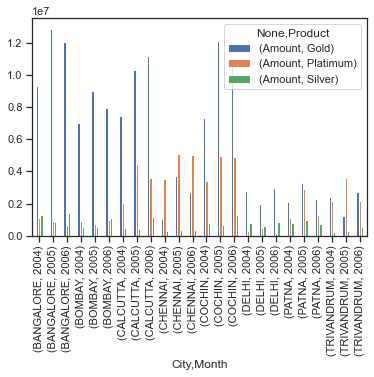

In [55]:
spend_yearly_pivot.plot(kind = 'bar')
plt.show()

### Question 4

### a)

In [56]:
city_month_spend = spend_acq.groupby(['City' , spend_acq['Month'].dt.month])[['Amount']].sum()

In [57]:
city_month_spend

Amount
City       Month            
BANGALORE  1      9041796.84
           2      6734494.76
           3      5362903.07
           4      4207980.48
           5      6383115.13
...                      ...
TRIVANDRUM 8       453773.94
           9       186063.70
           10      285581.92
           11      143387.40
           12      640922.26

[96 rows x 1 columns]

<AxesSubplot:xlabel='City,Month'>

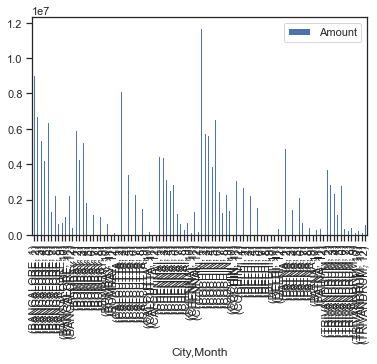

In [58]:
city_month_spend.plot(kind = 'bar')


### b)

In [59]:
spend['Month'] = pd.to_datetime(spend['Month'])

In [60]:
spend_yearly_air = spend.groupby([spend['Month'].dt.year , 'Type'])[['Amount']].sum().reset_index()

In [61]:
air_ticket = spend_yearly_air.loc[spend_yearly_air['Type'] == 'AIR TICKET']

In [62]:
air_ticket

,Month,Type,Amount
0,2004,AIR TICKET,8370914.59
15,2005,AIR TICKET,14495718.73
30,2006,AIR TICKET,10088812.10


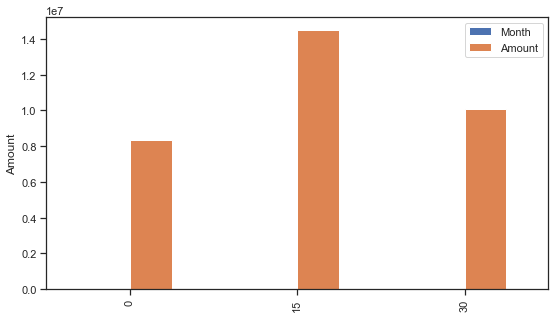

In [63]:
air_ticket.plot(kind = 'bar' , figsize=(9,5))
plt.xlabel('')
plt.ylabel('Amount')
plt.show()

### c)

In [64]:
spend_acq.head(3)

,Sl No:,Customer,Month,Type,Amount,No,Age,City,Product,Limit,Company,Segment,Age_bin
0,1,A1,2004-01-12,JEWELLERY,485470.80,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,56-79
1,2,A1,2004-01-03,PETRO,410556.13,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,56-79
2,3,A1,2004-01-15,CLOTHES,23740.46,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,56-79


In [65]:
monthly_spend_prod = spend_acq.groupby([spend_acq['Month'].dt.month , 'Product'])[['Amount']].sum()

In [66]:
monthly_spend_prod

Amount
Month Product              
1     Gold      32413831.83
      Platimum  14951578.51
      Silver     4206383.62
2     Gold      24779179.55
      Platimum   9134054.58
      Silver     2087018.37
3     Gold      19256972.48
      Platimum   7288837.68
      Silver     3909405.83
4     Gold      13170572.59
      Platimum   5182493.86
      Silver     1902322.65
5     Gold      21548169.76
      Platimum   8151926.49
      Silver     2140940.01
6     Gold       6538862.64
      Platimum   2965712.71
      Silver      689537.61
7     Gold       5167416.37
      Platimum   1288156.26
      Silver      530153.72
8     Gold       4954030.42
      Platimum   1714762.80
      Silver      293109.82
9     Gold       3816887.62
      Platimum   1667840.84
      Silver      442803.13
10    Gold       3018223.38
      Platimum    550275.04
      Silver      100001.50
11    Gold       9203267.46
      Platimum   2741618.42
      Silver      691102.63
12    Gold       2332940.96
      Platimum    750156.19
      Silver      200537.90

<AxesSubplot:xlabel='Month,Product'>

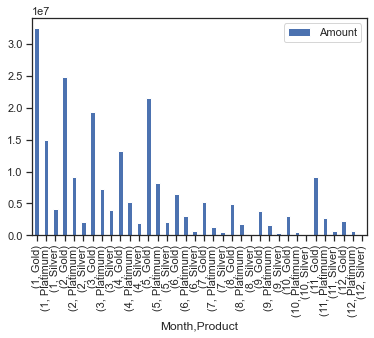

In [67]:
monthly_spend_prod.plot(kind = 'bar')

### Question 5

In [68]:
cust_repay['Month'] = pd.to_datetime(cust_repay['Month'])

In [69]:
cust_repay['Monthly'] = cust_repay['Month'].dt.month

In [70]:
cust_repay.head(3)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,Monthly
0,NaN,A1,2004-01-12,495414.75,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1.0
1,2.0,A1,2004-01-03,245899.02,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1.0
2,3.0,A1,2004-01-15,259490.06,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1.0


In [71]:
cust_repay['Yearly'] = cust_repay['Month'].dt.year

In [72]:
cust_repay.head(2)

,SL No:,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment,Monthly,Yearly
0,NaN,A1,2004-01-12,495414.75,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1.0,2004.0
1,2.0,A1,2004-01-03,245899.02,1.0,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1.0,2004.0


In [83]:
def top_10_cust(product,timeperiod):
    print('Give the product name and timeperiod for which you want the data')
    if product.lower()=='gold' and timeperiod.lower()=='monthly':
        pivot_cust = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot_cust.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='gold' and timeperiod.lower()=='yearly':
        pivot_cust = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot_cust.loc[('Gold',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='monthly':
        pivot_cust = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot_cust.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='silver' and timeperiod.lower()=='yearly':
        pivot_cust = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot_cust.loc[('Silver',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    if product.lower()=='platinum' and timeperiod.lower()=='monthly':
        pivot_cust = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Monthly',aggfunc='sum',values='Amount')
        result = pivot_cust.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    elif product.lower()=='platinum' and timeperiod.lower()=='yearly':
        pivot_cust = cust_repay.pivot_table(index=['Product','City','Customer'],columns='Yearly',aggfunc='sum',values='Amount')
        result = pivot_cust.loc[('Platinum',['BANGALORE','COCHIN','CALCUTTA','BOMBAY','CHENNAI','TRIVANDRUM','PATNA','DELHI']),:]
    return result


In [90]:
top_10_cust('silver' , 'yearly')

Give the product name and timeperiod for which you want the data


Yearly                           2004.0      2005.0      2006.0
Product City       Customer                                    
Silver  BANGALORE  A18        491592.71   638296.41   700000.00
                   A23        664965.71  1000010.00   872925.32
                   A59        676557.50   427247.08   600018.00
                   A72        100000.00         NaN         NaN
                   A76              NaN   265619.05         NaN
                   A77              NaN         NaN     3159.62
        BOMBAY     A22        953419.47  1141542.81   945271.83
                   A75              NaN   100003.00         NaN
                   A80              NaN         NaN   481205.64
        CALCUTTA   A2         400000.00   410274.00   200000.00
                   A58        533815.62   540173.85   411640.17
                   A73              NaN   100001.00         NaN
                   A78              NaN         NaN    55344.81
                   A87              NaN         NaN   100003.00
        CHENNAI    A85              NaN         NaN   100001.00
                   A9         380193.34   500015.00   697845.29
                   A96        100000.00         NaN         NaN
        COCHIN     A100        69551.19         NaN         NaN
                   A25        786338.08   611555.69  1000030.00
                   A7         500005.00   422177.27   608997.87
                   A74              NaN   100002.00         NaN
                   A79              NaN         NaN   193230.31
        DELHI      A24        397014.53  1184870.98   711068.52
                   A6         548574.15   427398.18   507280.51
        PATNA      A46        713614.32  1116730.89   839228.07
                   A8         800016.00   400008.00   531812.40
                   A84              NaN         NaN   100000.00
        TRIVANDRUM A57       1000010.00   200002.00   655926.99
                   A68        100000.00         NaN   100000.00
                   A86              NaN         NaN   100002.00